In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

In [18]:
warnings.filterwarnings('ignore')
years = 25
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']


adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Close']
#print(adj_close_df)

log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()
#print(log_returns)

portfolio_value = 500000
weights = np.array([1/len(tickers)]*len(tickers))
historical_returns = (log_returns * weights).sum(axis=1)
days = 5
historical_x_days_returns = historical_returns.rolling(window = days).sum()

#Was assisted in creating the Covariance Matrix
cov_matrix = log_returns.cov()* 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

confidence_levels = [0.9, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252)
    VaRs.append(VaR)
daily_portfolio_returns = historical_returns
cumulative_returns = (1+ daily_portfolio_returns).cumprod()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


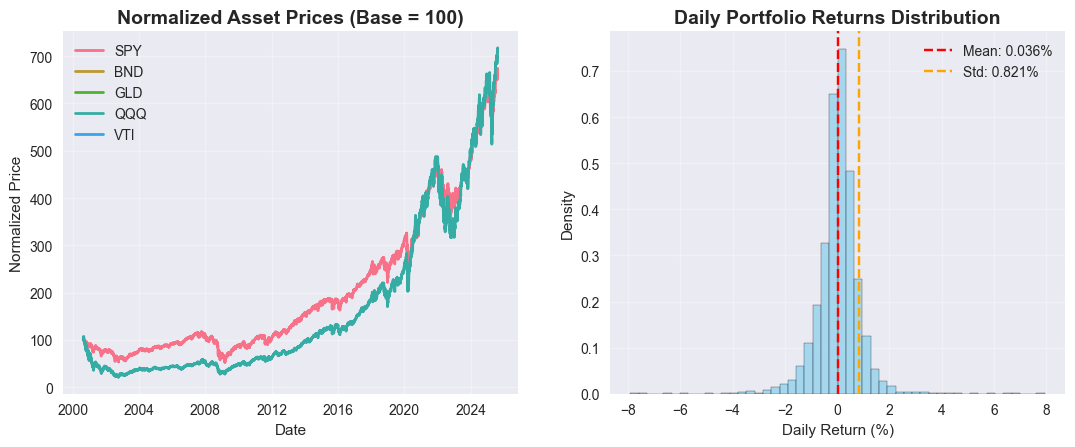

In [27]:
#Plotting and graphs, assisted by AI tools
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

fig = plt.figure(figsize=(20, 16))

plt.subplot(3, 3, 1)
normalized_prices = adj_close_df / adj_close_df.iloc[0] * 100
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker, linewidth=2)
plt.title('Normalized Asset Prices (Base = 100)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
plt.hist(daily_portfolio_returns * 100, bins=50, alpha=0.7, density=True, 
         color='skyblue', edgecolor='black')
plt.axvline(daily_portfolio_returns.mean() * 100, color='red', linestyle='--', 
           label=f'Mean: {daily_portfolio_returns.mean()*100:.3f}%')
plt.axvline(daily_portfolio_returns.std() * 100, color='orange', linestyle='--', 
           label=f'Std: {daily_portfolio_returns.std()*100:.3f}%')
plt.title('Daily Portfolio Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)